# 0. Data preparation

Load sample data and import all libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

df_train = pd.read_csv('./data/train.csv')

# 1. Show all missing data

Show and sort all missing data

In [3]:
#missing data
total = len(df_train)
sum_null_values = df_train.isnull().sum()
total_null_values = sum_null_values.sort_values(ascending = False)

percent = (sum_null_values / total).sort_values(ascending = False)
missing_data = pd.concat([total_null_values, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# 2. Correlation heatmap
Show heatmap of correlation between features

<AxesSubplot:>

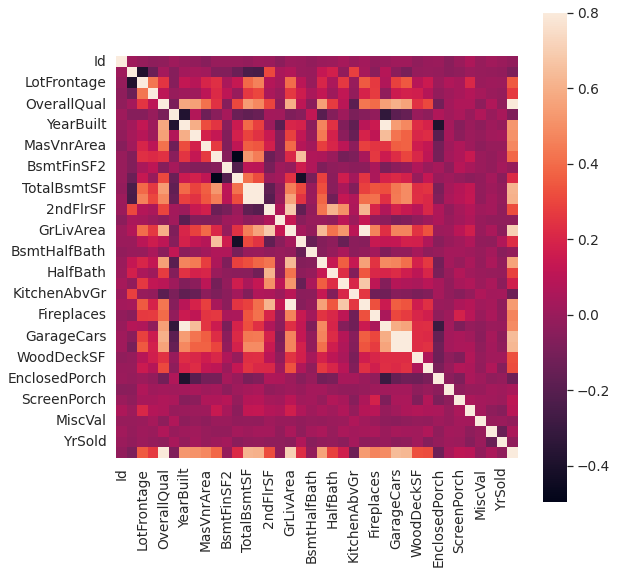

In [25]:
corrmat = df_train.corr()
plt.figure(figsize = (9, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

# 3. Normalize correlation
Normalized correlation matrix

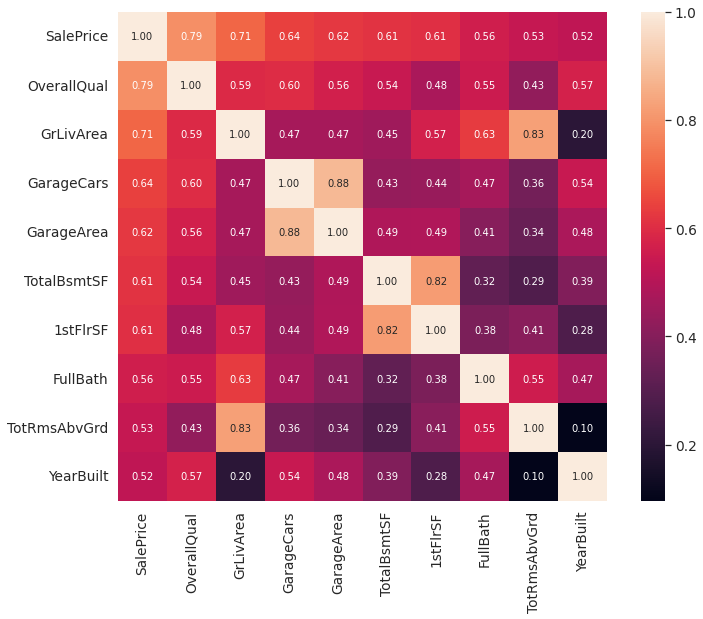

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
plt.figure(figsize = (12, 9))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = { 'size': 10 }, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# 4. Check for normality

Checking te normality of variables

/home/satrige/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


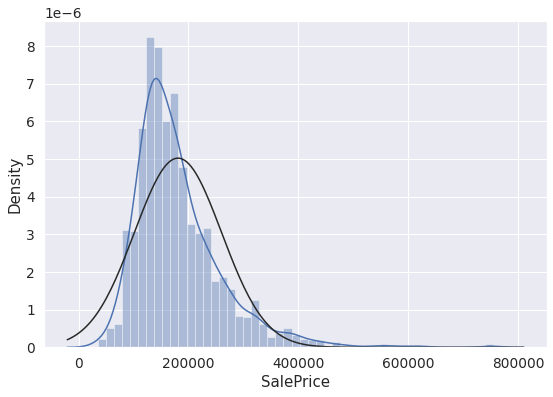

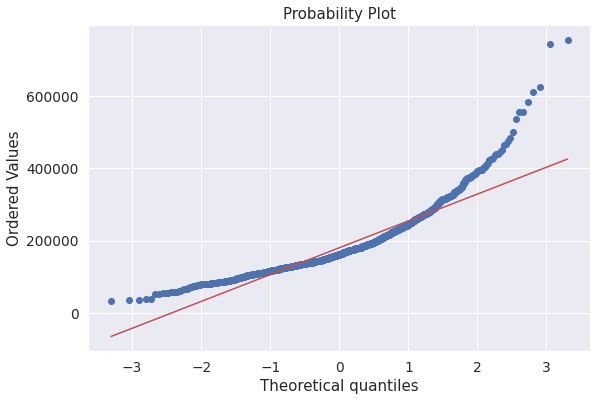

In [41]:
plt.figure(figsize = (9, 6))
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm)
plt.figure(figsize = (9, 6))
res = stats.probplot(df_train['SalePrice'], plot=plt)